## 5.3 交叉验证

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 5.3.1 导入Ames房价数据集

In [2]:
house = fetch_openml(name = 'house_prices', as_frame=True)

In [3]:
house.data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [4]:
print('samples total = '+str(len(house.target)))
for i in range(3):
    print(house.data['LotArea'][i])
    print(house.target[i])

samples total = 1460
8450.0
208500.0
9600.0
181500.0
11250.0
223500.0


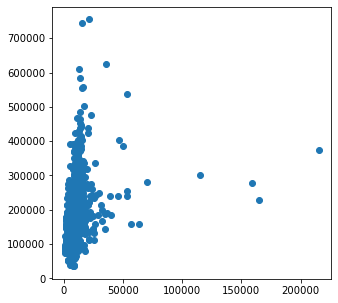

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(house.data['LotArea'], house.target)
plt.show()

### 5.3.2 拟合整个模型

In [6]:
import numpy as np

X = np.array(house.data['LotArea'])
y = house.target

lr = LinearRegression()

lr.fit(X.reshape(-1,1), y)
print(lr.coef_,lr.intercept_)

[2.09997195] 158836.15189687657


In [7]:
from sklearn.metrics import mean_squared_error

print('RMSE = %.3f'%np.sqrt(mean_squared_error(y_true=y, y_pred=lr.predict(X.reshape(-1, 1)))))
R2 = lr.score(X.reshape(-1,1),y)
print("R2 = " + str(R2))

RMSE = 76601.254
R2 = 0.0696133153821119


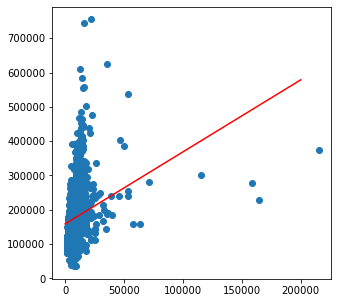

In [8]:
plt.figure(figsize = (5, 5))
plt.scatter(house.data['LotArea'], house.target)
plot_x = np.linspace(0, 200000, 10)
plot_y = plot_x * lr.coef_ + lr.intercept_
plt.plot(plot_x, plot_y, c = 'r')

plt.show()

### 5.3.3 留出法

In [9]:
1460*0.3

438.0

In [10]:
X_lo_train = X[:-400]
y_lo_train = y[:-400]
X_lo_test = X[-400:]
y_lo_test = y[-400:]

In [11]:
lr_lo = LinearRegression()
lr_lo.fit(X_lo_train.reshape(-1, 1), y_lo_train)
print(lr_lo.coef_,lr_lo.intercept_)

[1.90680178] 161933.31484947674


In [12]:
R2_lo = lr_lo.score(X_lo_test.reshape(-1, 1),y_lo_test)
print('RMSE = %.3f'% np.sqrt(mean_squared_error(y_true = y_lo_test, y_pred = lr_lo.predict(X_lo_test.reshape(-1, 1)))))
print("R2 = " + str(R2_lo))

RMSE = 74231.559
R2 = 0.06326085917192104


### 5.3.4 交叉验证法

#### 5.3.4.1 留一法（Leave-One-Out, LOO）

In [13]:
from sklearn.model_selection import LeaveOneOut

sample_x = range(5)
loo = LeaveOneOut()
for train, test in loo.split(sample_x):
    print(train,test)

[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]


In [14]:
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits = len(X))
rmse_scores = cross_val_score(lr, X.reshape(-1, 1), y, scoring = 'neg_root_mean_squared_error', cv=crossvalidation)
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Folds: 1460, mean RMSE: 55310.496


#### 5.3.4.2 留P法（Leave-P-Out, LPO）

In [15]:
from sklearn.model_selection import LeavePOut

In [16]:
sample_x = np.zeros(5)
lpo = LeavePOut(p = 2)
for train, test in lpo.split(sample_x):
    print(train,test)

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


#### 5.3.4.3 10折交叉验证

In [17]:
crossvalidation = KFold(n_splits=10)
R2_scores = cross_val_score(lr, X.reshape(-1, 1), y, cv=crossvalidation)
rmse_scores = cross_val_score(lr, X.reshape(-1, 1), y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Folds: %i, mean R2: %.3f' % (len(R2_scores), np.mean(R2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), np.mean(-rmse_scores)))

Folds: 10, mean R2: 0.033
Folds: 10, mean RMSE: 77311.496
